## PLOTS for ICCS'21 paper on Multi-objective irrigation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import copy



from crop_optimization import Optimization

In [2]:
#colors for plots 

random_color_plot = '#fc8d59'
sugar_beet_color_plot = '#7b3294'
potato_color_plot = '#abd9e9'

## Load data for plots

In [3]:
# Sugar-beet data 
sugar_beet_crop_yield = np.load('./npy_files/steps_300_normal_weather/sugar_beet_crop_yields.npy')
sugar_beet_irrigation_amount = np.load('./npy_files/steps_300_normal_weather/sugar_beet_irrifation_ammount.npy')
sugar_beet_water_loss = np.load('./npy_files/steps_300_normal_weather/sugar_beet_water_loss.npy')
sugar_beet_paretto_front = np.load('./npy_files/steps_300_normal_weather/sugar_beet_function_values_for_paretto.npy')
sugar_beet_optimal_solution = np.load('./npy_files/steps_300_normal_weather/sugar_beet_optimal_solutions.npy',allow_pickle=True)

# Potato data 
potato_crop_yield = np.load('./npy_files/steps_300_normal_weather/potato_crop_yields.npy')
potato_irrigation_amount = np.load('./npy_files/steps_300_normal_weather/potato_irrifation_ammount.npy')
potato_water_loss = np.load('./npy_files/steps_300_normal_weather/potato_water_loss.npy')
potato_paretto_front = np.load('./npy_files/steps_300_normal_weather/potato_function_values_for_paretto.npy')
potato_optimal_solution = np.load('./npy_files/steps_300_normal_weather/potato_optimal_solutions.npy',allow_pickle=True)



In [4]:
folders_for_plots = sorted(os.listdir('./npy_files/'))[:5]
random_crop_yield_sugar_beet = np.array([])
random_water_loss_sugar_beet = np.array([])
random_irrigation_sugar_beet = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join('./npy_files/', folder, 'sugar_beetcrop_yields.npy'))
    random_crop_yield_sugar_beet = np.append(random_crop_yield_sugar_beet, _crop)
    _water_loss = np.load(os.path.join('./npy_files/', folder, 'sugar_beetwater_loss.npy'))
    random_water_loss_sugar_beet = np.append(random_water_loss_sugar_beet, _water_loss)
    _irrigation = np.load(os.path.join('./npy_files/', folder, 'sugar_beetirrifation_ammount.npy'))
    random_irrigation_sugar_beet = np.append(random_irrigation_sugar_beet, _irrigation)
sugar_beet_random = np.stack([random_crop_yield_sugar_beet, random_water_loss_sugar_beet], axis=1)





folders_for_plots = sorted(os.listdir('./npy_files/'))[:5]
random_crop_yield_potato = np.array([])
random_water_loss_potato = np.array([])
random_irrigation_potato = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join('./npy_files/', folder, 'potatocrop_yields.npy'))
    random_crop_yield_potato = np.append(random_crop_yield_potato, _crop)
    _water_loss = np.load(os.path.join('./npy_files/', folder, 'potatowater_loss.npy'))
    random_water_loss_potato = np.append(random_water_loss_potato, _water_loss)
    _irrigation = np.load(os.path.join('./npy_files/', folder, 'potatoirrifation_ammount.npy'))
    random_irrigation_potato = np.append(random_irrigation_potato, _irrigation)
potato_random = np.stack([random_crop_yield_potato, random_water_loss_potato], axis=1)


# Crop yield forecating based on real farmer information

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import json
import argparse
import multiprocessing
import matplotlib.pyplot as plt


WOFOST = Optimization()
path_to_user_file = '../util/input_data/malino_sugar_beet.json'
# path_to_user_file = args.path_to_user_file
with open(path_to_user_file, 'r') as f:
    WOFOST.user_parameters = json.load(f)

latitude = int(WOFOST.user_parameters['latitude'])
longitude = int(WOFOST.user_parameters['longitude'])
crop_name = WOFOST.user_parameters['crop_name']

#load historical weather data
path_CSV_dir = '../data/meteo/'

def round_geoposition(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)
latitude = round_geoposition(WOFOST.user_parameters['latitude'])
longitude = round_geoposition(WOFOST.user_parameters['longitude'])
WOFOST.weather_loader(path_CSV_dir, latitude, longitude)

WOFOST.data_dir = '../util/input_data/'
crop_results=[]

# Range of year to compute mean crop yield and mean water loss
input_years = np.arange(WOFOST.NASA_last_year-20, WOFOST.NASA_last_year)
historical_yield = []
water_loss = []
for year in input_years:
    df_crop = WOFOST.crop_hpc(year)
    historical_yield.append(df_crop['TWSO'][-1])
    print('year', year, ', crop yield', df_crop['TWSO'][-1])
    water_loss.append(WOFOST.total_ammount_of_losed_water)
df_sugar_beet = pd.DataFrame({"range": input_years,"yield":historical_yield, "loss":water_loss})





LOAD FROM LOCAL CSV WEATHER DATABASE
year 1999 , crop yield 12040.3104606106
year 2000 , crop yield 10642.050966014172
year 2001 , crop yield 13239.462270418735
year 2002 , crop yield 9943.263427685179
year 2003 , crop yield 10991.346215146741
year 2004 , crop yield 11281.127833284983
year 2005 , crop yield 13625.995123216118
year 2006 , crop yield 10993.705401179066
year 2007 , crop yield 12180.754200446487
year 2008 , crop yield 10735.664826596094
year 2009 , crop yield 12884.875143808926
year 2010 , crop yield 7587.761027061699
year 2011 , crop yield 13605.07716770133
year 2012 , crop yield 14770.999780745356
year 2013 , crop yield 13556.942077227859
year 2014 , crop yield 13206.725489367323
year 2015 , crop yield 13169.542461002786
year 2016 , crop yield 12986.721892372734
year 2017 , crop yield 9482.53093549163
year 2018 , crop yield 13061.833188630582


## Potato crop yield

In [7]:
WOFOST = Optimization()
path_to_user_file = '../util/input_data/malino_potato.json'
with open(path_to_user_file, 'r') as f:
    WOFOST.user_parameters = json.load(f)

latitude = int(WOFOST.user_parameters['latitude'])
longitude = int(WOFOST.user_parameters['longitude'])
crop_name = WOFOST.user_parameters['crop_name']

#load historical weather data
path_CSV_dir = '../data/meteo/'


def round_geoposition(x, prec=1, base=.5):
    return round(base * round(float(x)/base),prec)
latitude = round_geoposition(WOFOST.user_parameters['latitude'])
longitude = round_geoposition(WOFOST.user_parameters['longitude'])
WOFOST.weather_loader(path_CSV_dir, latitude, longitude)

WOFOST.data_dir = '../util/input_data/'
crop_results=[]


input_years = np.arange(WOFOST.NASA_last_year-20, WOFOST.NASA_last_year)
historical_yield = []
water_loss = []
for year in input_years:
    df_crop = WOFOST.crop_hpc(year)
    historical_yield.append(df_crop['TWSO'][-1])
    print('year', year, ', crop yield', df_crop['TWSO'][-1])
    water_loss.append(WOFOST.total_ammount_of_losed_water)
df_potato = pd.DataFrame({"range": input_years,"yield":historical_yield, "loss":water_loss})

LOAD FROM LOCAL CSV WEATHER DATABASE
year 1999 , crop yield 9427.896958085927
year 2000 , crop yield 14007.085783577717
year 2001 , crop yield 13020.161382113414
year 2002 , crop yield 7827.332676898579
year 2003 , crop yield 14896.792358463823
year 2004 , crop yield 14071.441813947677
year 2005 , crop yield 15084.756282490007
year 2006 , crop yield 14310.813485822413
year 2007 , crop yield 11082.064698944856
year 2008 , crop yield 14571.853492076601
year 2009 , crop yield 15222.340562094641
year 2010 , crop yield 9427.995323935995
year 2011 , crop yield 9208.62942824806
year 2012 , crop yield 14531.661463256503
year 2013 , crop yield 13612.590550129058
year 2014 , crop yield 12589.129650554472
year 2015 , crop yield 13605.179459304394
year 2016 , crop yield 12583.8882115723
year 2017 , crop yield 13798.801076016298
year 2018 , crop yield 11674.951124734931


# Summary plots


### How to identify 'optimal' solution based on Pareto-front

We used "weighted-sum" method from `pymoo` package

User (or Farmer) may estimate which objective function is more important for farming

We assumed that the importance of each of the objective functions is equal

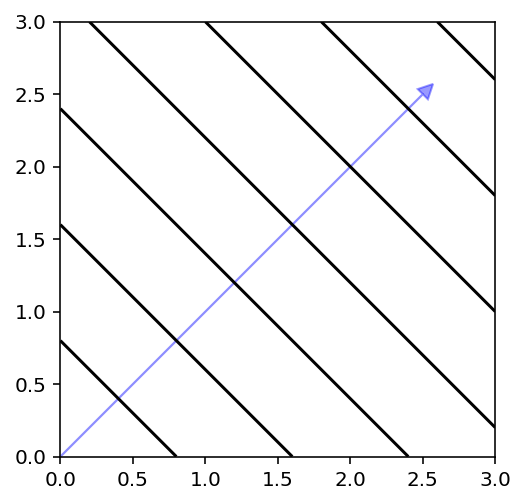

In [8]:
weights = np.array([0.5, 0.5])


## Decomposition

### Load and normalize paretto front fot potato crop

Best regarding decomposition: NSGA-II - Point 7 - Crop Yield - 13.97 t/ha, Water-loss - 24.67 cm
Best regarding decomposition: Monte-Carlo Search - Point 7098 - Crop Yield - 13.77 t/ha, Water-loss - 31.92 cm
Farmer solution: Crop Yield 12.73, Water-loss 24.08 cm 


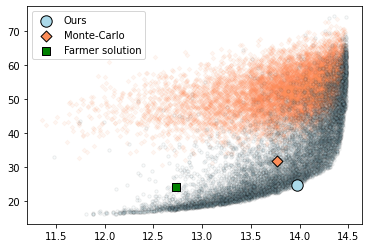

In [19]:
from pymoo.factory import get_problem, get_visualization, get_decomposition

#Load and normalize paretto front fot potato crop

potato_paretto_front = np.load('./npy_files/steps_300_normal_weather/potato_for_paretto.npy')
normalized_potato_paretto_front = copy.deepcopy(potato_paretto_front)
normalized_potato_paretto_front[:, 0] = (potato_paretto_front[:, 0]-np.mean(potato_paretto_front[:, 0]))/np.std(potato_paretto_front[:, 0])
normalized_potato_paretto_front[:, 1] = (potato_paretto_front[:, 1]-np.mean(potato_paretto_front[:, 1]))/np.std(potato_paretto_front[:, 1])


# Return values of crop to original values
normalized_potato_paretto_front[:, 0] = normalized_potato_paretto_front[:, 0] * -1

decomp = get_decomposition("weighted-sum")
I_paretto_potato = get_decomposition("weighted-sum").do(normalized_potato_paretto_front, weights).argmin()
# print("Best regarding decomposition: Point %s - %s" % (I_paretto_potato, potato_paretto_front[I_paretto_potato]))
print("Best regarding decomposition: NSGA-II - Point %s - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % (I_paretto_potato, potato_paretto_front[I_paretto_potato][0], potato_paretto_front[I_paretto_potato][1]))





# Load and normalize Monte-Carlo data for potato crop 

folders_for_plots = sorted(os.listdir('./npy_files/'))[:5]
random_crop_yield_potato = np.array([])
random_water_loss_potato = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join('./npy_files/', folder, 'potatocrop_yields.npy'))
    random_crop_yield_potato = np.append(random_crop_yield_potato, _crop)
    _water_loss = np.load(os.path.join('./npy_files/', folder, 'potatowater_loss.npy'))
    random_water_loss_potato = np.append(random_water_loss_potato, _water_loss)
potato_random = np.stack([random_crop_yield_potato, random_water_loss_potato], axis=1)

normalized_potato_random_search = copy.deepcopy(potato_random)


normalized_potato_random_search[:,0]=(potato_random[:,0] - np.mean(potato_random[:,0]))/np.std(potato_random[:,0])
normalized_potato_random_search[:,1]=(potato_random[:,1] - np.mean(potato_random[:,1]))/np.std(potato_random[:,1])

normalized_potato_random_search[:,0] = normalized_potato_random_search[:,0] * -1


decomp = get_decomposition("weighted-sum")
I_random_potato = get_decomposition("weighted-sum").do(normalized_potato_random_search, weights).argmin()
print("Best regarding decomposition: Monte-Carlo Search - Point %s - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % (I_random_potato, potato_random[I_random_potato][0], potato_random[I_random_potato][1]))


#farmer

print(f"Farmer solution: Crop Yield {df_potato['yield'].mean()/1000:.2f}, Water-loss {df_potato['loss'].mean():.2f} cm ")


#Plots

# plt.figure(figsize=(13,8))
plt.scatter(potato_random[:,0], potato_random[:,1],facecolor=random_color_plot, s=10, alpha=0.07,marker='D' )


plt.scatter( potato_crop_yield, potato_water_loss, edgecolors='black', facecolor=potato_color_plot, s=10, alpha=0.07)
# plt.scatter(potato_paretto_front[:, 0], potato_paretto_front[:,1], edgecolors='black',facecolor='red', s =70)
plt.scatter(potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1], edgecolors='black', facecolor=potato_color_plot, marker='o', s=130,  label = 'Ours')


# Real farmer solution
plt.scatter(potato_random[I_random_potato,0], potato_random[I_random_potato,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1, label='Monte-Carlo')
plt.scatter(df_potato['yield'].mean()/1000, df_potato['loss'].mean(), edgecolors='black',s = 60, marker='s', facecolor = 'green', label='Farmer solution')
plt.legend()

# plt.savefig('./plots_ICCS/Random_search_and_optimizer_potato.png', dpi=300)
# plt.savefig('./plots_ICCS/Random_search_and_optimizer_potato.svg' )

### Pareto front - potato

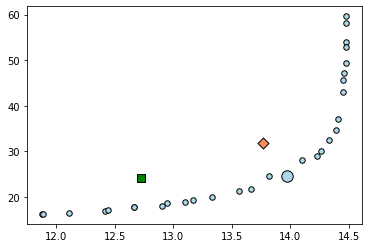

In [20]:
plt.scatter(potato_random[I_random_potato,0], potato_random[I_random_potato,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1)
plt.scatter(potato_paretto_front[:, 0], potato_paretto_front[:,1], edgecolors='black',facecolor=potato_color_plot, s =30)
plt.scatter(df_potato['yield'].mean()/1000, df_potato['loss'].mean(), edgecolors='black',s = 60, marker='s', facecolor = 'green', label='Farmer solution')
plt.scatter(potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1], edgecolors='black', facecolor=potato_color_plot, marker='o', s=130)

# plt.savefig('./plots_ICCS/Pareto_front_potato.png', dpi=300)
# plt.savefig('./plots_ICCS/Pareto_front_potato.svg' )


##  Load data for sugar-beet crop 


Best regarding decomposition: NSGA-II - Point 13 - Crop Yield - 12.17 t/ha, Water-loss - 30.31 cm
Best regarding decomposition: Monte-Carlo Search - Point 298 - Crop Yield - 12.15 t/ha, Water-loss - 40.70 cm
Farmer solution: Crop Yield 12.00, Water-loss 31.69 cm 


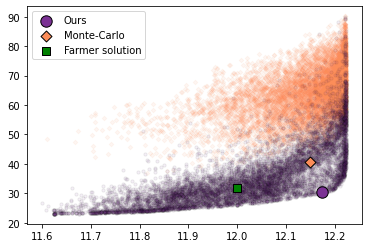

In [18]:


from pymoo.factory import get_problem, get_visualization, get_decomposition

#Load and normalize paretto front fot potato crop

sugar_beet_paretto_front = np.load('./npy_files/steps_300_normal_weather/sugar_beet_for_paretto.npy')
normalized_sugar_beet_paretto_front = copy.deepcopy(sugar_beet_paretto_front)
normalized_sugar_beet_paretto_front[:, 0] = (sugar_beet_paretto_front[:, 0]-np.mean(sugar_beet_paretto_front[:, 0]))/np.std(sugar_beet_paretto_front[:, 0])
normalized_sugar_beet_paretto_front[:, 1] = (sugar_beet_paretto_front[:, 1]-np.mean(sugar_beet_paretto_front[:, 1]))/np.std(sugar_beet_paretto_front[:, 1])


# Return values of crop to original values
normalized_sugar_beet_paretto_front[:, 0] = normalized_sugar_beet_paretto_front[:, 0] * -1

decomp = get_decomposition("weighted-sum")
I_paretto_sugar_beet = get_decomposition("weighted-sum").do(normalized_sugar_beet_paretto_front, weights).argmin()


print("Best regarding decomposition: NSGA-II - Point %s - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % (I_paretto_sugar_beet, sugar_beet_paretto_front[I_paretto_sugar_beet][0], sugar_beet_paretto_front[I_paretto_sugar_beet][1]))




# Load and normalize Monte-Carlo data for sugar-beet crop 

folders_for_plots = sorted(os.listdir('./npy_files/'))[:5]
random_crop_yield_sugar_beet = np.array([])
random_water_loss_sugar_beet = np.array([])
for folder in folders_for_plots:
    _crop = np.load(os.path.join('./npy_files/', folder, 'sugar_beetcrop_yields.npy'))
    random_crop_yield_sugar_beet = np.append(random_crop_yield_sugar_beet, _crop)
    _water_loss = np.load(os.path.join('./npy_files/', folder, 'sugar_beetwater_loss.npy'))
    random_water_loss_sugar_beet = np.append(random_water_loss_sugar_beet, _water_loss)
sugar_beet_random = np.stack([random_crop_yield_sugar_beet, random_water_loss_sugar_beet], axis=1)

normalized_sugar_beet_random_search = copy.deepcopy(sugar_beet_random)


normalized_sugar_beet_random_search[:,0]=(sugar_beet_random[:,0] - np.mean(sugar_beet_random[:,0]))/np.std(sugar_beet_random[:,0])
normalized_sugar_beet_random_search[:,1]=(sugar_beet_random[:,1] - np.mean(sugar_beet_random[:,1]))/np.std(sugar_beet_random[:,1])

normalized_sugar_beet_random_search[:,0] = normalized_sugar_beet_random_search[:,0] * -1


decomp = get_decomposition("weighted-sum")
I_random_sugar_beet = get_decomposition("weighted-sum").do(normalized_sugar_beet_random_search, weights).argmin()


print("Best regarding decomposition: Monte-Carlo Search - Point %s - Crop Yield - %.2f t/ha, Water-loss - %.2f cm" % (I_random_sugar_beet, sugar_beet_random[I_random_sugar_beet][0], sugar_beet_random[I_random_sugar_beet][1]))

print(f"Farmer solution: Crop Yield {df_sugar_beet['yield'].mean()/1000:.2f}, Water-loss {df_sugar_beet['loss'].mean():.2f} cm ")

plt.scatter(sugar_beet_random[:,0], sugar_beet_random[:,1],facecolor=random_color_plot, s=10, alpha=0.07, marker='D' )


plt.scatter( sugar_beet_crop_yield, sugar_beet_water_loss, edgecolors='black', facecolor=sugar_beet_color_plot, s=10, alpha=0.07)

plt.scatter(sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1], edgecolors='black', facecolor=sugar_beet_color_plot, marker='o', s=130, label = 'Ours')


# Real farmer solution
plt.scatter(sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1, label='Monte-Carlo')
plt.scatter(df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean(), edgecolors='black',s = 60, marker='s', color = 'green', label='Farmer solution')

plt.legend()
# plt.savefig('./plots_ICCS/Random_search_and_optimizer_sugar_beet.png', dpi=300)
# plt.savefig('./plots_ICCS/Random_search_and_optimizer_sugar_beet.svg' )


### Pareto front - sugar-beet

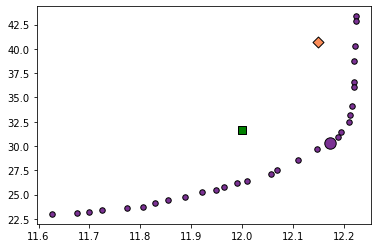

In [17]:
plt.scatter(sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1], edgecolors='black', facecolor=random_color_plot, marker='D', s=60, zorder=1)
plt.scatter(sugar_beet_paretto_front[:, 0], sugar_beet_paretto_front[:,1], edgecolors='black',facecolor=sugar_beet_color_plot, s =30)
plt.scatter(df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean(), edgecolors='black',s = 60, marker='s', color = 'green', label='Farmer solution')
plt.scatter(sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1], edgecolors='black', facecolor=sugar_beet_color_plot, marker='o', s=130)


# plt.savefig('./plots_ICCS/Pareto_front_sugar_beet.png', dpi=300)
# plt.savefig('./plots_ICCS/Pareto_front_sugar_beet.svg' )


# Barplots

In [94]:
plt.rcParams.update({'font.size': 16})

## Potato

In [22]:
import seaborn as sns

<Figure size 432x288 with 0 Axes>

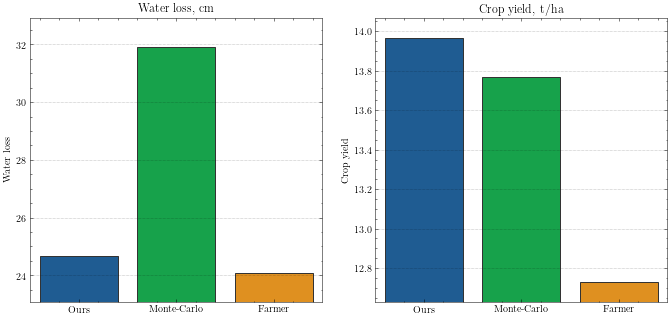

In [59]:
methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1]]
mc_search = [potato_random[I_random_potato,0], potato_random[I_random_potato,1]]
farmer = [df_potato['yield'].mean()/1000, df_potato['loss'].mean()]
df_bar_plot = pd.DataFrame({'Method':methods, 'Crop yield':[ours[0],mc_search[0],farmer[0] ], 'Water loss':[ours[1],mc_search[1],farmer[1] ]})


plt.style.use(['science', 'grid'])
plt.figure(figsize=(6,4))

fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig.tight_layout(pad=3.0)
sns.barplot(x='Method', y='Water loss',data=df_bar_plot, edgecolor=".2", ax=ax1)
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2)
ax1.set_ylim(min(df_bar_plot['Water loss'])-1.,max(df_bar_plot['Water loss'])+1.)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax1.set_title('Water loss, cm')
ax2.set_xlabel('')
ax2.set_title('Crop yield, t/ha')
plt.show()

## Sugar-beet 

<Figure size 432x288 with 0 Axes>

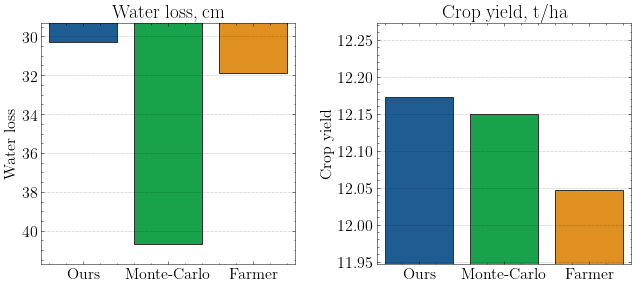

In [107]:
methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1]]
mc_search = [sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1]]
farmer = [df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean()]
df_bar_plot = pd.DataFrame({'Method':methods, 'Crop yield':[ours[0],mc_search[0],farmer[0] ], 'Water loss':[ours[1],mc_search[1],farmer[1] ]})


plt.style.use(['science', 'grid'])
plt.figure(figsize=(6,4))
fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig.tight_layout(pad=3.0)
sns.barplot(x='Method', y='Water loss',data=df_bar_plot, edgecolor=".2", ax=ax1)
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2)
ax1.set_ylim(min(df_bar_plot['Water loss'])-1.,max(df_bar_plot['Water loss'])+1.)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax1.invert_yaxis()
ax1.set_title('Water loss, cm')
ax2.set_xlabel('')
ax2.set_title('Crop yield, t/ha')
plt.savefig('./plots_ICCS/new_asb_sugar_beet.svg')
plt.show()


In [24]:
df_w = pd.DataFrame(WOFOST.weather.export())
df_w['DAY']=pd.to_datetime(df_w['DAY'])
df_w.set_index('DAY', inplace = True)
rain_a = np.array(df_w.groupby(pd.Grouper(freq='Y')).sum()['RAIN'][16:-2])

In [38]:
print('Potato - Ours', np.mean(rain_a)+np.sum(potato_optimal_solution[I_paretto_potato][7:]) - potato_paretto_front[I_paretto_potato][1])
print('Potato - Monte-Carlo', np.mean(rain_a) - potato_random[I_random_potato][1])
print('Potato - Farmer', np.mean(rain_a) - potato_random[I_random_potato][1])

Potato - Ours 57.57224463655309
Potato - Monte-Carlo 35.20041785139368
Potato - Farmer 35.20041785139368


In [37]:
# Drop dates (index 0..7)
np.sum(potato_optimal_solution[I_paretto_potato][7:])

15.12798279535691

# Potato WUE

0.7000006891498077 0.6963642558971219 0.7032091273143175


<Figure size 432x288 with 0 Axes>

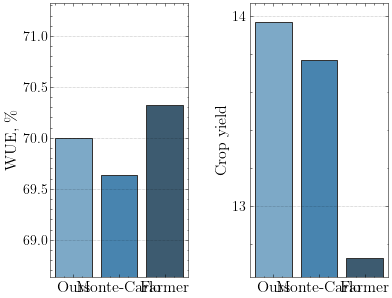

In [128]:


WUE_ours = 1 - potato_paretto_front[I_paretto_potato][1]/(np.mean(rain_a)+np.sum(potato_optimal_solution[I_paretto_potato][7:]))
WUE_Monte_Carlo = 1 - potato_random[I_random_potato][1]/(np.mean(rain_a) +random_irrigation_potato[np.where(random_water_loss_potato==potato_random[I_random_potato,1])][0])
WUE_farmer = 1 - df_potato['loss'].mean()/(np.mean(rain_a)+np.sum(WOFOST.user_parameters['irrigation_ammounts']))
print(WUE_ours, WUE_Monte_Carlo, WUE_farmer)

methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [potato_paretto_front[I_paretto_potato,0], potato_paretto_front[I_paretto_potato,1]]
mc_search = [potato_random[I_random_potato,0], potato_random[I_random_potato,1]]
farmer = [df_potato['yield'].mean()/1000, df_potato['loss'].mean()]
df_bar_plot = pd.DataFrame({'Method':methods, 'Crop yield':[ours[0],mc_search[0],farmer[0] ], 'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer]})
df_bar_plot['WUE'] = df_bar_plot['WUE']*100

plt.style.use(['science', 'grid'])
plt.figure(figsize=(6,4))


fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(6,5))
fig.tight_layout(pad=2.0)
sns.barplot(x='Method', y='WUE',data=df_bar_plot, edgecolor=".2",ax=ax1 ,palette="Blues_d")
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2 , palette="Blues_d")
ax1.set_ylim(min(df_bar_plot['WUE'])-1,max(df_bar_plot['WUE'])+1)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('WUE, \%')
ax2.set_xlabel('')



plt.savefig('./plots_ICCS/Intro_potato_GA.svg')
plt.show()

# Sugar beet

In [125]:
label_size = 14
plt.rcParams['ytick.labelsize'] = label_size 

0.697807998623353 0.5975054209592285 0.6093939060513196


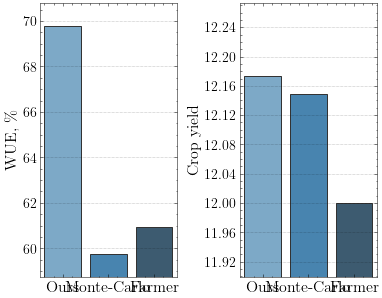

In [127]:
from matplotlib.ticker import MaxNLocator

my_colors = 'myg'

WUE_ours = 1 - sugar_beet_paretto_front[I_paretto_sugar_beet][1]/(np.mean(rain_a)+np.sum(sugar_beet_optimal_solution[I_paretto_potato][7:]))
WUE_Monte_Carlo = 1 - sugar_beet_random[I_random_sugar_beet][1]/(np.mean(rain_a) +random_irrigation_sugar_beet[np.where(random_water_loss_sugar_beet==sugar_beet_random[I_random_sugar_beet,1])][0])
WUE_farmer = 1 - df_sugar_beet['loss'].mean()/(np.mean(rain_a)+np.sum(WOFOST.user_parameters['irrigation_ammounts']))
print(WUE_ours, WUE_Monte_Carlo, WUE_farmer)

methods=['Ours', 'Monte-Carlo', 'Farmer']
ours = [sugar_beet_paretto_front[I_paretto_sugar_beet,0], sugar_beet_paretto_front[I_paretto_sugar_beet,1]]
mc_search = [sugar_beet_random[I_random_sugar_beet,0], sugar_beet_random[I_random_sugar_beet,1]]
farmer = [df_sugar_beet['yield'].mean()/1000, df_sugar_beet['loss'].mean()]


df_bar_plot = pd.DataFrame({'Method':methods, 'Crop yield':[ours[0],mc_search[0],farmer[0] ], 'WUE':[WUE_ours, WUE_Monte_Carlo, WUE_farmer]})
df_bar_plot['WUE'] = df_bar_plot['WUE']*100

plt.style.use(['science', 'grid'])


fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(6,5))
fig.tight_layout(pad=2.0)
sns.barplot(x='Method', y='WUE',data=df_bar_plot, edgecolor=".2",ax=ax1 ,palette="Blues_d")
sns.barplot(x='Method', y='Crop yield',data=df_bar_plot, edgecolor=".2", ax=ax2 , palette="Blues_d")
ax1.set_ylim(min(df_bar_plot['WUE'])-1,max(df_bar_plot['WUE'])+1)
ax2.set_ylim(min(df_bar_plot['Crop yield'])-.1,max(df_bar_plot['Crop yield'])+.1)
ax1.set_xlabel('')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_ylabel('WUE, \%')
ax2.set_xlabel('')



plt.savefig('./plots_ICCS/Intro_sugar_beet_GA.svg')
plt.show()